In [3]:
from __future__ import unicode_literals, print_function, division
from io import open #匯入資料
import glob #檔案路徑的設定，可以用於*的擴展

def findFiles(path): 
    return glob.glob(path)

print(findFiles('data/names/*.txt'))


import unicodedata #編碼處理
import string

#為了方便後面做Index用，建立a-z,A-Z的26*2個英文字母，加上5個特殊符號，共57個符號
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)


#將Unicode轉ASCII
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )


## Unicode string to ASCII
# http://stackoverflow.com/a/518232/2809427
#def unicodeToAscii(s):
#    return ''.join(
#        c for c in unicodedata.normalize('NFD', s) #NFD, Normalization Form Decomposition 標準分解
#        if unicodedata.category(c) != 'Mn'
#    )
#s1 = 'Spicy Jalape\u00f1o' #整体字符
#s2 = 'Spicy Jalapen\u0303o' #原始字母＋組合字符
#s1 == s2
#t3 = unicodedata.normalize('NFD', s1)
#t4 = unicodedata.normalize('NFD', s2)
#t3 == t4


#print(unicodeToAscii('Ślusàrski'))

# 構建category_lines，放置每個分類的內容(像是名字內容)
category_lines = {} #分類內容
all_categories = [] #分類項目（如：英文姓名、中文姓名）

# 讀取文件並分行
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [line for line in lines]

for filename in findFiles('data/names/*.txt'):
    category = filename.split('/')[-1].split('.')[0]
    #18種類別
    all_categories.append(category)
    lines = readLines(filename) #每一個檔案裡面的內容
    #category_lines 內容組合，類別：名字List，也就是一個類別裡面，有Ｎ個要被分類的內容
    category_lines[category] = lines 

n_categories = len(all_categories) #n_categories獲得分類總數

['data/names/Arabic.txt', 'data/names/Chinese.txt', 'data/names/Czech.txt', 'data/names/Dutch.txt', 'data/names/English.txt', 'data/names/French.txt', 'data/names/German.txt', 'data/names/Greek.txt', 'data/names/Irish.txt', 'data/names/Italian.txt', 'data/names/Japanese.txt', 'data/names/Korean.txt', 'data/names/Polish.txt', 'data/names/Portuguese.txt', 'data/names/Russian.txt', 'data/names/Scottish.txt', 'data/names/Spanish.txt', 'data/names/Vietnamese.txt']


In [4]:
all_categories

['Arabic',
 'Chinese',
 'Czech',
 'Dutch',
 'English',
 'French',
 'German',
 'Greek',
 'Irish',
 'Italian',
 'Japanese',
 'Korean',
 'Polish',
 'Portuguese',
 'Russian',
 'Scottish',
 'Spanish',
 'Vietnamese']

## 講解程式碼

In [2]:
len(string.ascii_letters) +5

57

In [3]:
#lines = open(filename, encoding='utf-8').read().strip().split('\n')
open('data/names/Chinese.txt', encoding='utf-8')

<_io.TextIOWrapper name='data/names/Chinese.txt' mode='r' encoding='utf-8'>

In [4]:
#lines = open(filename, encoding='utf-8').read().strip().split('\n')
open('data/names/Chinese.txt', encoding='utf-8').read()

'Ang\nAu-Yong\nBai\nBan\nBao\nBei\nBian\nBui\nCai\nCao\nCen\nChai\nChaim\nChan\nChang\nChao\nChe\nChen\nCheng\nCheung\nChew\nChieu\nChin\nChong\nChou\nChu\nCui\nDai\nDeng\nDing\nDong\nDou\nDuan\nEng\nFan\nFei\nFeng\nFoong\nFung\nGan\nGauk\nGeng\nGim\nGok\nGong\nGuan\nGuang\nGuo\nGwock\nHan\nHang\nHao\nHew\nHiu\nHong\nHor\nHsiao\nHua\nHuan\nHuang\nHui\nHuie\nHuo\nJia\nJiang\nJin\nJing\nJoe\nKang\nKau\nKhoo\nKhu\nKong\nKoo\nKwan\nKwei\nKwong\nLai\nLam\nLang\nLau\nLaw\nLew\nLian\nLiao\nLim\nLin\nLing\nLiu\nLoh\nLong\nLoong\nLuo\nMah\nMai\nMak\nMao\nMar\nMei\nMeng\nMiao\nMin\nMing\nMoy\nMui\nNie\nNiu\nOu-Yang\nOw-Yang\nPan\nPang\nPei\nPeng\nPing\nQian\nQin\nQiu\nQuan\nQue\nRan\nRao\nRong\nRuan\nSam\nSeah\nSee \nSeow\nSeto\nSha\nShan\nShang\nShao\nShaw\nShe\nShen\nSheng\nShi\nShu\nShuai\nShui\nShum\nSiew\nSiu\nSong\nSum\nSun\nSze \nTan\nTang\nTao\nTeng\nTeoh\nThean\nThian\nThien\nTian\nTong\nTow\nTsang\nTse\nTsen\nTso\nTze\nWan\nWang\nWei\nWen\nWeng\nWon\nWong\nWoo\nXiang\nXiao\nXie\nXing\n

In [5]:
#透過Strip去除空白跟換行符號
open('data/names/Chinese.txt', encoding='utf-8').read().strip()

'Ang\nAu-Yong\nBai\nBan\nBao\nBei\nBian\nBui\nCai\nCao\nCen\nChai\nChaim\nChan\nChang\nChao\nChe\nChen\nCheng\nCheung\nChew\nChieu\nChin\nChong\nChou\nChu\nCui\nDai\nDeng\nDing\nDong\nDou\nDuan\nEng\nFan\nFei\nFeng\nFoong\nFung\nGan\nGauk\nGeng\nGim\nGok\nGong\nGuan\nGuang\nGuo\nGwock\nHan\nHang\nHao\nHew\nHiu\nHong\nHor\nHsiao\nHua\nHuan\nHuang\nHui\nHuie\nHuo\nJia\nJiang\nJin\nJing\nJoe\nKang\nKau\nKhoo\nKhu\nKong\nKoo\nKwan\nKwei\nKwong\nLai\nLam\nLang\nLau\nLaw\nLew\nLian\nLiao\nLim\nLin\nLing\nLiu\nLoh\nLong\nLoong\nLuo\nMah\nMai\nMak\nMao\nMar\nMei\nMeng\nMiao\nMin\nMing\nMoy\nMui\nNie\nNiu\nOu-Yang\nOw-Yang\nPan\nPang\nPei\nPeng\nPing\nQian\nQin\nQiu\nQuan\nQue\nRan\nRao\nRong\nRuan\nSam\nSeah\nSee \nSeow\nSeto\nSha\nShan\nShang\nShao\nShaw\nShe\nShen\nSheng\nShi\nShu\nShuai\nShui\nShum\nSiew\nSiu\nSong\nSum\nSun\nSze \nTan\nTang\nTao\nTeng\nTeoh\nThean\nThian\nThien\nTian\nTong\nTow\nTsang\nTse\nTsen\nTso\nTze\nWan\nWang\nWei\nWen\nWeng\nWon\nWong\nWoo\nXiang\nXiao\nXie\nXing\n

In [6]:
#lines = open(filename, encoding='utf-8').read().strip().split('\n')
open('data/names/Chinese.txt', encoding='utf-8').read().strip().split('\n')

['Ang',
 'Au-Yong',
 'Bai',
 'Ban',
 'Bao',
 'Bei',
 'Bian',
 'Bui',
 'Cai',
 'Cao',
 'Cen',
 'Chai',
 'Chaim',
 'Chan',
 'Chang',
 'Chao',
 'Che',
 'Chen',
 'Cheng',
 'Cheung',
 'Chew',
 'Chieu',
 'Chin',
 'Chong',
 'Chou',
 'Chu',
 'Cui',
 'Dai',
 'Deng',
 'Ding',
 'Dong',
 'Dou',
 'Duan',
 'Eng',
 'Fan',
 'Fei',
 'Feng',
 'Foong',
 'Fung',
 'Gan',
 'Gauk',
 'Geng',
 'Gim',
 'Gok',
 'Gong',
 'Guan',
 'Guang',
 'Guo',
 'Gwock',
 'Han',
 'Hang',
 'Hao',
 'Hew',
 'Hiu',
 'Hong',
 'Hor',
 'Hsiao',
 'Hua',
 'Huan',
 'Huang',
 'Hui',
 'Huie',
 'Huo',
 'Jia',
 'Jiang',
 'Jin',
 'Jing',
 'Joe',
 'Kang',
 'Kau',
 'Khoo',
 'Khu',
 'Kong',
 'Koo',
 'Kwan',
 'Kwei',
 'Kwong',
 'Lai',
 'Lam',
 'Lang',
 'Lau',
 'Law',
 'Lew',
 'Lian',
 'Liao',
 'Lim',
 'Lin',
 'Ling',
 'Liu',
 'Loh',
 'Long',
 'Loong',
 'Luo',
 'Mah',
 'Mai',
 'Mak',
 'Mao',
 'Mar',
 'Mei',
 'Meng',
 'Miao',
 'Min',
 'Ming',
 'Moy',
 'Mui',
 'Nie',
 'Niu',
 'Ou-Yang',
 'Ow-Yang',
 'Pan',
 'Pang',
 'Pei',
 'Peng',
 'Ping',
 'Qian',

In [7]:
#category = filename.split('/')[-1].split('.')[0]
'data/names/Chinese.txt'.split('/')

['data', 'names', 'Chinese.txt']

In [8]:
#category = filename.split('/')[-1].split('.')[0]
'data/names/Chinese.txt'.split('/')[-1]

'Chinese.txt'

In [9]:
#category = filename.split('/')[-1].split('.')[0]
'data/names/Chinese.txt'.split('/')[-1].split('.')

['Chinese', 'txt']

In [10]:
#category = filename.split('/')[-1].split('.')[0]
'data/names/Chinese.txt'.split('/')[-1].split('.')[0]

'Chinese'

In [11]:
#分類名稱
all_categories

['Arabic',
 'Chinese',
 'Czech',
 'Dutch',
 'English',
 'French',
 'German',
 'Greek',
 'Irish',
 'Italian',
 'Japanese',
 'Korean',
 'Polish',
 'Portuguese',
 'Russian',
 'Scottish',
 'Spanish',
 'Vietnamese']

In [12]:
category_lines[]

SyntaxError: invalid syntax (<ipython-input-12-1e3a82aee65e>, line 1)

In [13]:
lines = readLines('data/names/Chinese.txt')
lines

['Ang',
 'Au-Yong',
 'Bai',
 'Ban',
 'Bao',
 'Bei',
 'Bian',
 'Bui',
 'Cai',
 'Cao',
 'Cen',
 'Chai',
 'Chaim',
 'Chan',
 'Chang',
 'Chao',
 'Che',
 'Chen',
 'Cheng',
 'Cheung',
 'Chew',
 'Chieu',
 'Chin',
 'Chong',
 'Chou',
 'Chu',
 'Cui',
 'Dai',
 'Deng',
 'Ding',
 'Dong',
 'Dou',
 'Duan',
 'Eng',
 'Fan',
 'Fei',
 'Feng',
 'Foong',
 'Fung',
 'Gan',
 'Gauk',
 'Geng',
 'Gim',
 'Gok',
 'Gong',
 'Guan',
 'Guang',
 'Guo',
 'Gwock',
 'Han',
 'Hang',
 'Hao',
 'Hew',
 'Hiu',
 'Hong',
 'Hor',
 'Hsiao',
 'Hua',
 'Huan',
 'Huang',
 'Hui',
 'Huie',
 'Huo',
 'Jia',
 'Jiang',
 'Jin',
 'Jing',
 'Joe',
 'Kang',
 'Kau',
 'Khoo',
 'Khu',
 'Kong',
 'Koo',
 'Kwan',
 'Kwei',
 'Kwong',
 'Lai',
 'Lam',
 'Lang',
 'Lau',
 'Law',
 'Lew',
 'Lian',
 'Liao',
 'Lim',
 'Lin',
 'Ling',
 'Liu',
 'Loh',
 'Long',
 'Loong',
 'Luo',
 'Mah',
 'Mai',
 'Mak',
 'Mao',
 'Mar',
 'Mei',
 'Meng',
 'Miao',
 'Min',
 'Ming',
 'Moy',
 'Mui',
 'Nie',
 'Niu',
 'Ou-Yang',
 'Ow-Yang',
 'Pan',
 'Pang',
 'Pei',
 'Peng',
 'Ping',
 'Qian',

In [2]:
print("all_letters: "+str(len(all_letters)))
print("n_categories: "+str(n_categories))
#print("category_lines:"+str(category_lines['雙亡'][:5]))

all_letters: 57
n_categories: 18


## 講解程式碼結束

In [15]:
#在PyTorch中，我們需要將名字數據轉換成Tensor才能在模型中讀入使用。
#在本文中，最小粒度為字母，意思是我們將名字裡面的每個字母都作為一個獨立的語言粒度來處理，
#為了數學化字母，我們這裡使用”One Hot Encoding”來表示，這裡每個字母被表示成<1 * 57>的向量。
#由於名字由多個字母組成，所以每個名字就被表示成了2D的矩陣<名字字符個數 乘 1 乘 57>。

#為了表示單個字母，我們使用大小<1 x n_letters>的“One Hot Encoding”，如：“b”= <0 1 0 0 0 ...>。

#額外的1維度是因為PyTorch假設所有內容都是批量的 - 我們在這裡只使用1的批量大小。

In [79]:
import torch

# 建立函式方便尋找all_letters的Index像是"a"=10000000000....
def letterToIndex(letter):
    return all_letters.find(letter)

# 將一個字母轉成Tensor顯示
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters) #建立一個1*57的Tensor
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# 建立one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('b')) #將內容轉為字母 #ex. a,b,c..
print(lineToTensor('Jones').size()) #5為字母個數、1為維度、57為總字母

tensor([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])
torch.Size([5, 1, 57])


## 程式碼講解

In [158]:
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)#依據輸入長度，建立1維，長度57個字母的Tensor
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

In [18]:
lineToTensor('a')

tensor([[[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.]]])

## 程式碼講解結束

In [159]:
import torch.nn as nn

 
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size) #做input線性轉換
        self.i2o = nn.Linear(input_size + hidden_size, output_size) #做output線性轉換
        self.softmax = nn.LogSoftmax(dim=1) #透過Softmax做歸一化

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1) #將輸入層與隱藏層做整合
        hidden = self.i2h(combined) #將輸入層、隱藏層 
        output = self.i2o(combined) #將輸入層、隱藏層
        output = self.softmax(output)#透過Softmax做歸一化
        return output, hidden

    def initHidden(self): #初始化隱藏層
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories) #57個字母,隱藏層數,分類共18個語言

In [71]:
n_letters, n_hidden, n_categories 

(57, 128, 18)

為了運行這個網絡的一個步(step)，我們需要傳入輸入（在我們的例子中，當前字母的張量）和一個先前的隱藏狀態（初始化為零）。我們將返回輸出（每種語言的概率）和下一個隱藏狀態（我們為下一步保留）。

In [20]:
input = letterToTensor('A')
hidden =torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)
print(output)

tensor([[-2.8298, -2.8878, -2.9380, -2.8052, -2.8213, -2.9298, -2.8267,
         -2.8566, -2.8708, -2.9233, -2.9994, -2.9105, -2.9050, -2.8537,
         -3.0061, -2.9458, -2.8728, -2.8724]])


為了提高效率，我們不希望為每一步創建一個新的Tensor，因此我們將使用lineToTensor而不是letterToTensor並使用切片。這可以通過預先計算批次的張量進一步優化。

In [82]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.9018, -2.8408, -2.8264, -2.9959, -2.6047, -2.7720, -2.4425,
         -3.9174, -3.0450, -3.4946, -3.2141, -2.1327, -3.1348, -3.4730,
         -2.9231, -3.0066, -3.1109, -2.5878]])


正如您所看到的，輸出是<1 x n_categories> Tensor，其中每個項目都是該類別的可能性（更高的可能性更高）。

## 訓練
## 訓練前準備

In [5]:
def categoryFromOutput(output): #透過topk取出比較好的結果
    top_n, top_i = output.topk(1) #Pytorch內建topk()
    category_i = top_i[0].item() 
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

NameError: name 'output' is not defined

在進入培訓之前，我們應該做一些輔助功能。第一個是解釋網絡的輸出，我們知道這是每個類別的可能性。我們可以使用Tensor.topk獲取最大價值的索引

In [161]:
#我們也想要一個快速的方式來獲得一個訓練樣例（一個名字和它的語言）：
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)] #取0~ 分類個數減1的範圍 0~17

def randomTrainingExample():
    category = randomChoice(all_categories) #隨機選擇分類
    line = randomChoice(category_lines[category]) #取得該分類的細部資料
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)#取得整個分類的Index
    line_tensor = lineToTensor(line) #將分類細部資料轉換one-hot vector
    return category, line, category_tensor, line_tensor #分類名稱、分類的細部資料、分類的Index、One-hot vector的結果

for i in range(5):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = Czech / line = Kusak
category = Spanish / line = Oleastro
category = German / line = Strand
category = Portuguese / line = Franco
category = Greek / line = Horiatis


訓練過程如下：
1.創建輸入和目標張量  
2.創建一個初始隱藏狀態(0初始化)  
3.輸入該步字母然後保持該步的隱藏狀態，將此隱藏狀態和下一步的字母輸入一起組成下一步輸出  
4.比較最終輸出結果和標記目標(類)   
5.反向傳播(並且更新參數)  
6.返回輸出和損失  

In [162]:
#衡量標準
criterion = nn.NLLLoss() #用於多分類模型，全名Negative Log Likelihood，通常用於最後一層是softmax

In [124]:
rnn

RNN(
  (i2h): Linear(in_features=185, out_features=128, bias=True)
  (i2o): Linear(in_features=185, out_features=18, bias=True)
  (softmax): LogSoftmax()
)

In [163]:
learning_rate = 0.005

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden() #初始化隱藏層

    rnn.zero_grad() #初始化優化的狀態

    for i in range(line_tensor.size()[0]): #取得每個細項的矩陣內容，每一個都跑一次RNN
        output, hidden = rnn(line_tensor[i], hidden) #rnn(input[0], hidden) 輸出結果

    loss = criterion(output, category_tensor) #透過NLLLoss獲得Loss
    loss.backward() #進行反向傳播

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters(): #依據每一層做處理
        p.data.add_(-learning_rate, p.grad.data)#從每一層加上學習速率

    return output, loss.item() #回傳運算成果

現在我們只需要用一堆例子來運行它。由於功能返回輸出和損失，我們可以印出預測結果，並記錄繪圖的損失。打印每一個print_every的例子，並且取平均值。

In [176]:
import time
import math

n_iters = 100000 #100000
print_every = 5000 #每print_every印出
plot_every = 1000 #每plot_every印出


# Keep track of losses for plotting
current_loss = 0 #初始為0
all_losses = [] 

def timeSince(since): #計算花費時間
    now = time.time()
    s = now - since #現在時間 減掉 開始時間
    m = math.floor(s / 60) #將秒數整理一下
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1): #n_iters + 1 因為從0開始算
    category, line, category_tensor, line_tensor = randomTrainingExample() #取得隨機的資料
    output, loss = train(category_tensor, line_tensor) #進行訓練
    current_loss += loss #將Loss做累計

    # Print iter number, loss, name and guess
    if iter % print_every == 0: #當迴圈 除以print_every餘數為0則印出
        guess, guess_i = categoryFromOutput(output) #取得output結果，放入categoryFromOutput判斷是否為同一個
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0: #提供給plot_every不能比print_every多，因為plot_every要畫圖。
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 5s) 1.4092 Rao / Vietnamese ✗ (Chinese)
10000 10% (0m 11s) 1.5664 Teunissen / Dutch ✓
15000 15% (0m 17s) 1.8509 Estévez / Polish ✗ (Spanish)
20000 20% (0m 22s) 2.3377 Mcphee / Scottish ✗ (English)
25000 25% (0m 27s) 0.5078 You / Korean ✓
30000 30% (0m 33s) 0.8315 Chun / Korean ✓
35000 35% (0m 39s) 1.0974 Acconcio / Italian ✓
40000 40% (0m 44s) 2.5380 Winther / Arabic ✗ (German)
45000 45% (0m 49s) 0.4715 O'Byrne / Irish ✓
50000 50% (0m 56s) 1.6195 Movchun / Irish ✗ (Russian)
55000 55% (1m 1s) 1.1086 Snyder / Dutch ✓
60000 60% (1m 6s) 1.3461 Royer / French ✓
65000 65% (1m 11s) 2.6547 Martel / Portuguese ✗ (French)
70000 70% (1m 16s) 1.6927 Cann / Chinese ✗ (Dutch)
75000 75% (1m 21s) 1.0708 Krupala / Czech ✓
80000 80% (1m 27s) 2.6342 Sloan / Scottish ✗ (English)
85000 85% (1m 31s) 0.1599 Hyun  / Korean ✓
90000 90% (1m 37s) 1.3611 Casales / Portuguese ✗ (Spanish)
95000 95% (1m 42s) 3.0162 Rios / Portuguese ✗ (Spanish)
100000 100% (1m 48s) 1.5849 Ter Avest / French ✗ (Dutch)


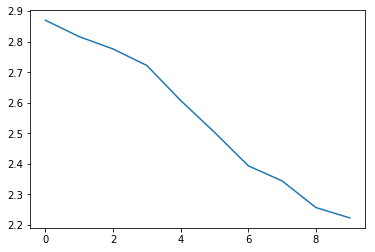

In [175]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)


#################################################
# 建立混淆矩陣
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# 回傳輸出
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# 檢視正確猜到的紀錄
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# 進行歸一化（變成0~1）
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# 畫圖
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# 設定xy軸
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# 建立標籤
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

In [203]:
#進行數值預測
def predict(input_line, n_predictions=5): #n_predictions設定要預測的數量
    print('\n> %s' % input_line) #印出名稱
    with torch.no_grad(): #no_grad在上下文中切掉梯度
        output = evaluate(lineToTensor(input_line))

        # 獲得N個類別
        topv, topi = output.topk(n_predictions, 1) #n_predictions為個數、維度為1
        #topv原始值、topi索引值
        predictions = []

        for i in range(n_predictions): #取得預測結果
            value = topv[0][i].item() #取得第i個值
            category_index = topi[0][i].item() #取得第i個值的索引值
            print(all_categories[category_index]) #category_index就是預測的分類結果
            #print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Bill')
predict('Jerry')


> Bill
Irish
English
Scottish
German
Czech

> Jerry
Scottish
English
French
Czech
Dutch


In [201]:
#透過本程式實作文件分類，加上jieba，預計30分鐘